In [ ]:
## data source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
## This is a fictional dataset created by IBM Scientists. 
## Logistic Regression to predict employee attrition - 
## 1) who will attrite and who won't 
## 2) what are the factors driving attrition?

In [28]:
# import all the necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
data_dir="C:\\Users\\VK\\Documents\\Poojastuff\\dono\\Logistic Regression\\Logistic Regression"
os.chdir(data_dir)
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
data = pd.read_csv('HR-Employee-Attrition.csv')

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
data['Attrition'] = data['Attrition'].map(lambda x: 1 if x=='Yes' else 0)

In [7]:
## One-hot encode categorical columns

BusinessTravelDummy = pd.get_dummies(data['BusinessTravel'], prefix = 'class',drop_first=True)
DepartmentDummy = pd.get_dummies(data['Department'] , prefix = 'class',drop_first=True)
EducationFieldDummy = pd.get_dummies(data['Education'] , prefix = 'class',drop_first=True)
GenderDummy = pd.get_dummies(data['Gender'] , prefix = 'class',drop_first=True)
JobRoleDummy = pd.get_dummies(data['JobRole'] , prefix = 'class',drop_first=True)
MaritalStatusDummy = pd.get_dummies(data['MaritalStatus'] , prefix = 'class',drop_first=True)
Over18Dummy = pd.get_dummies(data['Over18'] , prefix = 'class',drop_first=True)
OverTimeDummy = pd.get_dummies(data['OverTime'] , prefix = 'class',drop_first=True)

data = pd.concat([data,BusinessTravelDummy,DepartmentDummy,EducationFieldDummy,GenderDummy,JobRoleDummy,
                  MaritalStatusDummy, Over18Dummy, OverTimeDummy], axis=1)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,class_Laboratory Technician,class_Manager,class_Manufacturing Director,class_Research Director,class_Research Scientist,class_Sales Executive,class_Sales Representative,class_Married,class_Single,class_Yes
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,0,0,0,0,1,0,0,1,1
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,1,0,0,0,0,0,0,0,1,1
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,0,0,0,0,1,0,0,1,0,1
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,1,0,0,0,0,0,0,1,0,0


In [8]:
data.drop(['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus', 
           'Over18','OverTime'] , axis = 1 , inplace = True)

In [9]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,class_Laboratory Technician,class_Manager,class_Manufacturing Director,class_Research Director,class_Research Scientist,class_Sales Executive,class_Sales Representative,class_Married,class_Single,class_Yes
0,41,1,1102,1,2,1,1,2,94,3,...,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,1,2,3,61,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,1,4,4,92,2,...,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,1,5,4,56,3,...,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,1,7,1,40,3,...,1,0,0,0,0,0,0,1,0,0


In [10]:
## Split the data into test and train
xtrain, xtest, ytrain, ytest = train_test_split(data.drop('Attrition', axis=1), data['Attrition'],\
                                                    test_size=0.2, random_state=156)

In [11]:
## Build Model
# Adding constant term as we are using statsmodel
xtrain = sm.add_constant(xtrain)
xtest = sm.add_constant(xtest)

In [12]:
model1=sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()

In [13]:
print(model1.summary2())

                          Results: Generalized linear model
Model:                      GLM                     AIC:                   804.9080  
Link Function:              logit                   BIC:                   -7286.1895
Dependent Variable:         Attrition               Log-Likelihood:        -358.45   
Date:                       2021-04-04 19:15        LL-Null:               -520.09   
No. Observations:           1176                    Deviance:              716.91    
Df Model:                   43                      Pearson chi2:          1.96e+03  
Df Residuals:               1132                    Scale:                 1.0000    
Method:                     IRLS                                                     
-------------------------------------------------------------------------------------
                              Coef.   Std.Err.     z    P>|z|     [0.025     0.975]  
--------------------------------------------------------------------------------

In [14]:
 ## back propagation of features
while max(model1.pvalues)>0.05:
    for x,y in zip(model1.pvalues,xtrain.columns):
        if x>0.05:
            xtrain = xtrain.drop(y,axis=1)
            xtest = xtest.drop(y,axis=1)
            model1 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()
    break

In [15]:
finalmodel = model1
finalmodel.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Generalized linear model
===========================================================================
Model:                  GLM                  AIC:                815.5235  
Link Function:          logit                BIC:                -7412.4606
Dependent Variable:     Attrition            Log-Likelihood:     -390.76   
Date:                   2021-04-04 19:15     LL-Null:            -520.09   
No. Observations:       1176                 Deviance:           781.52    
Df Model:               16                   Pearson chi2:       1.52e+03  
Df Residuals:           1159                 Scale:              1.0000    
Method:                 IRLS                                               
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Age                         -0.0437   0.0107 -4.0699 0.0000 -0.0648 -0.0227
DistanceFromHome             0.0408   0.0108  3.7770 0.0002  0.0196  0.0619
EnvironmentSatisfaction     -0.3290   0.0833 -3.9477 0.0001 -0.4924 -0.1657
JobInvolvement              -0.3820   0.1226 -3.1153 0.0018 -0.6223 -0.1417
JobSatisfaction             -0.2997   0.0799 -3.7501 0.0002 -0.4563 -0.1430
NumCompaniesWorked           0.1336   0.0378  3.5312 0.0004  0.0594  0.2077
RelationshipSatisfaction    -0.1398   0.0847 -1.6502 0.0989 -0.3058  0.0262
WorkLifeBalance             -0.0995   0.1166 -0.8532 0.3936 -0.3281  0.1291
YearsAtCompany               0.0370   0.0324  1.1421 0.2534 -0.0265  0.1006
YearsInCurrentRole          -0.1323   0.0467 -2.8300 0.0047 -0.2239 -0.0407
YearsSinceLastPromotion      0.1376   0.0407  3.3822 0.0007  0.0579  0.2173
YearsWithCurrManager        -0.1205   0.0457 -2.6375 0.0084 -0.2100 -0.0309
class_Travel_Frequently      2.3228   0.4466  5.2012 0.0000  1.4475  3.1981
class_Travel_Rarely          1.5163   0.4098  3.6999 0.0002  0.7131  2.3195
class_Laboratory Technician  0.6552   0.2204  2.9732 0.0029  0.2233  1.0872
class_Single                 1.1810   0.1900  6.2163 0.0000  0.8087  1.5534
class_Yes                    1.7194   0.1956  8.7910 0.0000  1.3360  2.1027
===========================================================================

"""

In [16]:
## Remove factors with high p-value
xtrain.drop(['WorkLifeBalance'] , axis = 1 , inplace = True)
xtest.drop(['WorkLifeBalance'] , axis = 1 , inplace = True)

In [17]:
finalmodel2 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()
finalmodel2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Generalized linear model
===========================================================================
Model:                  GLM                  AIC:                814.2500  
Link Function:          logit                BIC:                -7418.8040
Dependent Variable:     Attrition            Log-Likelihood:     -391.12   
Date:                   2021-04-04 19:17     LL-Null:            -520.09   
No. Observations:       1176                 Deviance:           782.25    
Df Model:               15                   Pearson chi2:       1.50e+03  
Df Residuals:           1160                 Scale:              1.0000    
Method:                 IRLS                                               
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Age                         -0.0451   0.0106 -4.2494 0.0000 -0.0659 -0.0243
DistanceFromHome             0.0400   0.0107  3.7182 0.0002  0.0189  0.0610
EnvironmentSatisfaction     -0.3402   0.0823 -4.1359 0.0000 -0.5014 -0.1790
JobInvolvement              -0.4014   0.1203 -3.3365 0.0008 -0.6372 -0.1656
JobSatisfaction             -0.3078   0.0793 -3.8814 0.0001 -0.4632 -0.1524
NumCompaniesWorked           0.1339   0.0378  3.5418 0.0004  0.0598  0.2081
RelationshipSatisfaction    -0.1470   0.0842 -1.7451 0.0810 -0.3121  0.0181
YearsAtCompany               0.0378   0.0324  1.1655 0.2438 -0.0258  0.1014
YearsInCurrentRole          -0.1336   0.0467 -2.8622 0.0042 -0.2251 -0.0421
YearsSinceLastPromotion      0.1369   0.0407  3.3680 0.0008  0.0572  0.2166
YearsWithCurrManager        -0.1207   0.0457 -2.6440 0.0082 -0.2103 -0.0312
class_Travel_Frequently      2.2360   0.4278  5.2271 0.0000  1.3976  3.0744
class_Travel_Rarely          1.4340   0.3907  3.6707 0.0002  0.6683  2.1997
class_Laboratory Technician  0.6507   0.2202  2.9556 0.0031  0.2192  1.0822
class_Single                 1.1645   0.1888  6.1676 0.0000  0.7944  1.5345
class_Yes                    1.7165   0.1955  8.7805 0.0000  1.3334  2.0997
===========================================================================

"""

In [18]:
## Remove factors with high p-value
xtrain.drop(['YearsAtCompany'] , axis = 1 , inplace = True)
xtest.drop(['YearsAtCompany'] , axis = 1 , inplace = True)

In [19]:
finalmodel3 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()
finalmodel3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Generalized linear model
===========================================================================
Model:                  GLM                  AIC:                813.5560  
Link Function:          logit                BIC:                -7424.5678
Dependent Variable:     Attrition            Log-Likelihood:     -391.78   
Date:                   2021-04-04 19:18     LL-Null:            -520.09   
No. Observations:       1176                 Deviance:           783.56    
Df Model:               14                   Pearson chi2:       1.67e+03  
Df Residuals:           1161                 Scale:              1.0000    
Method:                 IRLS                                               
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Age                         -0.0427   0.0103 -4.1312 0.0000 -0.0629 -0.0224
DistanceFromHome             0.0398   0.0107  3.7103 0.0002  0.0188  0.0608
EnvironmentSatisfaction     -0.3399   0.0821 -4.1388 0.0000 -0.5008 -0.1789
JobInvolvement              -0.4095   0.1197 -3.4198 0.0006 -0.6442 -0.1748
JobSatisfaction             -0.3045   0.0791 -3.8503 0.0001 -0.4594 -0.1495
NumCompaniesWorked           0.1291   0.0376  3.4303 0.0006  0.0553  0.2029
RelationshipSatisfaction    -0.1444   0.0840 -1.7178 0.0858 -0.3091  0.0204
YearsInCurrentRole          -0.1110   0.0428 -2.5956 0.0094 -0.1949 -0.0272
YearsSinceLastPromotion      0.1545   0.0382  4.0426 0.0001  0.0796  0.2295
YearsWithCurrManager        -0.0978   0.0418 -2.3387 0.0194 -0.1797 -0.0158
class_Travel_Frequently      2.2149   0.4262  5.1968 0.0000  1.3796  3.0503
class_Travel_Rarely          1.4051   0.3884  3.6180 0.0003  0.6439  2.1663
class_Laboratory Technician  0.6297   0.2190  2.8758 0.0040  0.2005  1.0589
class_Single                 1.1585   0.1886  6.1417 0.0000  0.7888  1.5282
class_Yes                    1.7163   0.1953  8.7874 0.0000  1.3335  2.0991
===========================================================================

"""

In [20]:
## Remove factors with high p-value
xtrain.drop(['RelationshipSatisfaction'] , axis = 1 , inplace = True)
xtest.drop(['RelationshipSatisfaction'] , axis = 1 , inplace = True)

In [21]:
finalmodel4 = sm.GLM(ytrain,xtrain,family=sm.families.Binomial()).fit()
finalmodel4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Generalized linear model
===========================================================================
Model:                  GLM                  AIC:                814.5037  
Link Function:          logit                BIC:                -7428.6900
Dependent Variable:     Attrition            Log-Likelihood:     -393.25   
Date:                   2021-04-04 19:19     LL-Null:            -520.09   
No. Observations:       1176                 Deviance:           786.50    
Df Model:               13                   Pearson chi2:       1.66e+03  
Df Residuals:           1162                 Scale:              1.0000    
Method:                 IRLS                                               
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Age                         -0.0452   0.0102 -4.4477 0.0000 -0.0652 -0.0253
DistanceFromHome             0.0381   0.0107  3.5749 0.0004  0.0172  0.0590
EnvironmentSatisfaction     -0.3549   0.0813 -4.3664 0.0000 -0.5142 -0.1956
JobInvolvement              -0.4502   0.1171 -3.8427 0.0001 -0.6798 -0.2206
JobSatisfaction             -0.3099   0.0787 -3.9380 0.0001 -0.4642 -0.1557
NumCompaniesWorked           0.1265   0.0375  3.3700 0.0008  0.0529  0.2001
YearsInCurrentRole          -0.1068   0.0424 -2.5160 0.0119 -0.1899 -0.0236
YearsSinceLastPromotion      0.1517   0.0381  3.9794 0.0001  0.0770  0.2264
YearsWithCurrManager        -0.0993   0.0416 -2.3857 0.0170 -0.1808 -0.0177
class_Travel_Frequently      2.1149   0.4147  5.0994 0.0000  1.3020  2.9278
class_Travel_Rarely          1.3149   0.3777  3.4809 0.0005  0.5745  2.0552
class_Laboratory Technician  0.6328   0.2184  2.8972 0.0038  0.2047  1.0610
class_Single                 1.1300   0.1871  6.0397 0.0000  0.7633  1.4967
class_Yes                    1.6891   0.1941  8.7024 0.0000  1.3087  2.0695
===========================================================================

"""

In [23]:
predictions=finalmodel4.predict(xtest)

In [24]:
threshold=0.5
predicted_classes = np.where(predictions>threshold, 1, 0)

In [25]:
accuracy_score(ytest, predicted_classes)

0.8605442176870748

In [26]:
confmat = confusion_matrix(ytest,predicted_classes)
conf = pd.DataFrame(confmat, index=['Actual 0','Actual 1'],columns=['Predicted 0','Predicted 1'])
conf

,Predicted 0,Predicted 1
Actual 0,234,13
Actual 1,28,19


In [27]:
print(classification_report(ytest,predicted_classes))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       247
           1       0.59      0.40      0.48        47

   micro avg       0.86      0.86      0.86       294
   macro avg       0.74      0.68      0.70       294
weighted avg       0.85      0.86      0.85       294



In [29]:
#Get roc auc score
roc_score = roc_auc_score(ytest, predictions)
print('ROC Score is '+str(roc_score))
#Get false positive rate, true positive rate and threshold using roc curve
falsePositiveRate, truePositiverate, threshold = roc_curve(ytest, predictions)

ROC Score is 0.8601946765440606


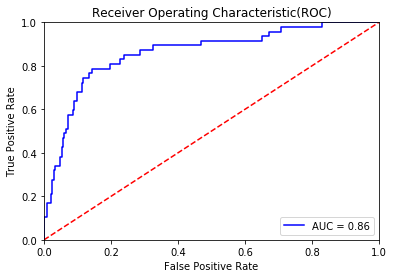

In [30]:
# Plotting ROC curve

plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(falsePositiveRate, truePositiverate, 'b', label = 'AUC = %0.2f' % roc_score)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [31]:
optimal_idx = np.argmax(truePositiverate-falsePositiveRate)
optimal_threshold = threshold[optimal_idx]
print(optimal_threshold)

0.26136108500721533


In [32]:
predicted_classes = np.where(predictions>optimal_threshold, 1, 0)

In [33]:
accuracy_score(ytest, predicted_classes)

0.8435374149659864

In [34]:
confusion_mat = confusion_matrix(ytest,predicted_classes)
confusion_df  = pd.DataFrame(confusion_mat,index=['Actual 0', 'Actual 1'],columns=['Predicted 0','Predicted 1'])
confusion_df

,Predicted 0,Predicted 1
Actual 0,212,35
Actual 1,11,36


In [35]:
print(classification_report(ytest,predicted_classes))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       247
           1       0.51      0.77      0.61        47

   micro avg       0.84      0.84      0.84       294
   macro avg       0.73      0.81      0.76       294
weighted avg       0.88      0.84      0.86       294



In [ ]:
## end of notebook